In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import training set
train = pd.read_csv('/Users/alessia/Desktop/churn/train.csv')

In [3]:
# summary statistics of the data
import statistics
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [4]:
train.isna().any() # there are no missing values

id                 False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [5]:
# visualize first 10 rows
print(train.head(10))

   id  CustomerId         Surname  CreditScore Geography  Gender   Age  \
0   0    15674932  Okwudilichukwu          668    France    Male  33.0   
1   1    15749177   Okwudiliolisa          627    France    Male  33.0   
2   2    15694510           Hsueh          678    France    Male  40.0   
3   3    15741417             Kao          581    France    Male  34.0   
4   4    15766172       Chiemenam          716     Spain    Male  33.0   
5   5    15771669        Genovese          588   Germany    Male  36.0   
6   6    15692819          Ch'ang          593    France  Female  30.0   
7   7    15669611     Chukwuebuka          678     Spain    Male  37.0   
8   8    15691707           Manna          676    France    Male  43.0   
9   9    15591721        Cattaneo          583   Germany    Male  40.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       3       0.00              2        1.0             0.0   
1       1       0.00              2        1.0       

In [6]:
print(train.tail(10))

            id  CustomerId    Surname  CreditScore Geography  Gender   Age  \
165024  165024    15734886     Martin          592   Germany  Female  33.0   
165025  165025    15687079      T'ang          635    France  Female  38.0   
165026  165026    15617454     Ifeatu          724   Germany    Male  59.0   
165027  165027    15703793      Bevan          767    France  Female  44.0   
165028  165028    15704770  Oluchukwu          630    France    Male  50.0   
165029  165029    15667085       Meng          667     Spain  Female  33.0   
165030  165030    15665521  Okechukwu          792    France    Male  35.0   
165031  165031    15664752       Hsia          565    France    Male  31.0   
165032  165032    15689614     Hsiung          554     Spain  Female  30.0   
165033  165033    15732798    Ulyanov          850    France    Male  31.0   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
165024       3  110993.29              2        1.0             1.0   

The dataset is comprised of both categorical and continuous variables.
- Surname is a categorical variable, which will be removed, because it won't be very useful in training a model
- CreditScore is a continuous variable
- Geography is a nominal variable
- Gender is a dummy variable, with levels Male and Female
- Age is a continuous variable
- Tenure is an ordinal variable, with levels from 0 to 10
- Balance is a continuous variable
- Num of Products is a continuous variable, taking on values from 0 to 4, but we treat it as an ordinal variable in these steps
- Has Credit Card is a dummy variable, with level 1 indicating Yes, and level 0 indicating No
- isActiveMember is a dummy variable, with 1 if the member is active and 0 if the individual is not active
- EstimatedSalary is a continuous variable
- Exited is the binary response variable, with 0 indicating a non-churner and 1 indicating a churner

We first take care of visualizing categorical variables through piecharts and barplots.

<Figure size 1500x1000 with 0 Axes>

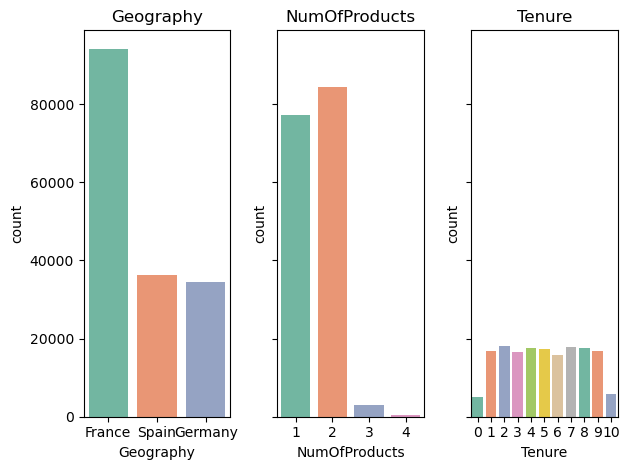

In [7]:
# barplots of multiclass categorical features
categorical_features = ["Geography", "NumOfProducts", "Tenure"]
plt.figure(figsize=(15, 10))
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(1, len(categorical_features), sharey=True)

for i, categorical_feature in enumerate(categorical_features):
    sns.countplot(data=train, x=categorical_feature, palette=colors, ax=ax[i])
    ax[i].set_title(categorical_feature)

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

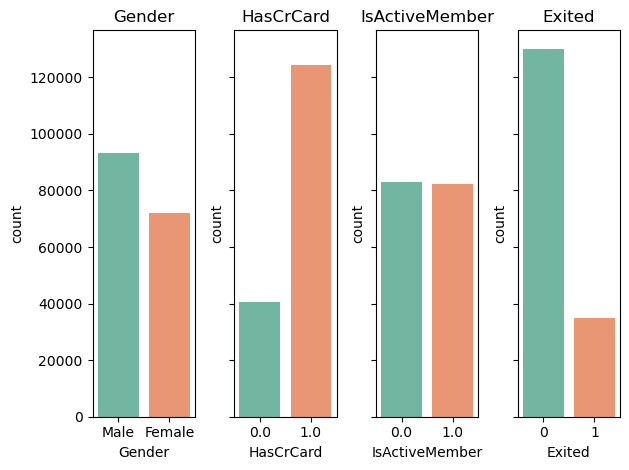

In [8]:
# barplots of binary features
categorical_features = ["Gender", "HasCrCard", "IsActiveMember", "Exited"]
plt.figure(figsize=(15, 10))
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(1, len(categorical_features), sharey=True)

for i, categorical_feature in enumerate(categorical_features):
    sns.countplot(data=train, x=categorical_feature, palette=colors, ax=ax[i])
    ax[i].set_title(categorical_feature)

plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

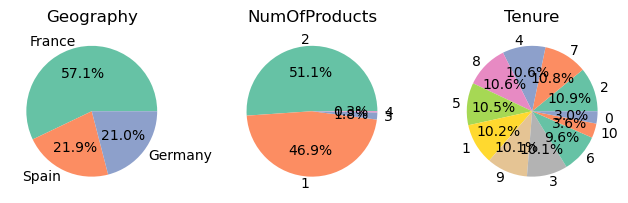

In [9]:
# visualize multiclass categorical variables as piecharts
categorical_features = ["Geography", "NumOfProducts", "Tenure"]
plt.figure(figsize=(15, 5))

colors = sns.color_palette("Set2")
fig, ax = plt.subplots(1, len(categorical_features))

for i, categorical_feature in enumerate(categorical_features):
    counts = train[categorical_feature].value_counts()
    
    ax[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
    ax[i].set_title(categorical_feature)

plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

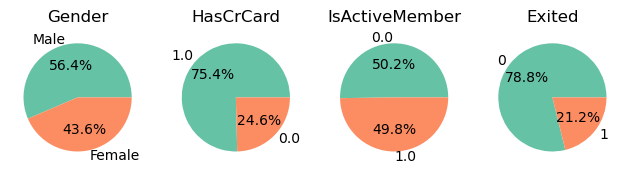

In [10]:
# visualize binary categorical variables as piecharts
categorical_features = ["Gender", "HasCrCard", "IsActiveMember", "Exited"]
plt.figure(figsize=(15, 5))

colors = sns.color_palette("Set2")
fig, ax = plt.subplots(1, len(categorical_features))

for i, categorical_feature in enumerate(categorical_features):
    counts = train[categorical_feature].value_counts()
    
    ax[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
    ax[i].set_title(categorical_feature)

plt.tight_layout()
plt.show()

The piecharts suggest that the response variable (Exited), used to predict whether a customer is a churner, has quite unbalanced classes. This is important overall for evaluation steps, as accuracy, as a metric for evaluation, could be misleading in this case, and should be substituted by metrics such as the ROC (Receiver Operating Characteristic) curve or the AUC (Area Under the Curve).

We now visualize continuous variables through histograms and boxplots.

/var/folders/9v/qb7tsq853qz0520rlq7dnrxc0000gn/T/ipykernel_18412/2972694037.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=continuous_feature, palette=colors, ax=ax[i])
/var/folders/9v/qb7tsq853qz0520rlq7dnrxc0000gn/T/ipykernel_18412/2972694037.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=continuous_feature, palette=colors, ax=ax[i])
/var/folders/9v/qb7tsq853qz0520rlq7dnrxc0000gn/T/ipykernel_18412/2972694037.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=continuous_feature, palette=colors, ax=ax[i])
/var/folders/9v/qb7tsq853qz0520rlq7dnrxc0000gn/T/ipykernel_18412/2972694037.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=continuous_feature, palette=colors, ax=ax[i])


<Figure size 1500x1000 with 0 Axes>

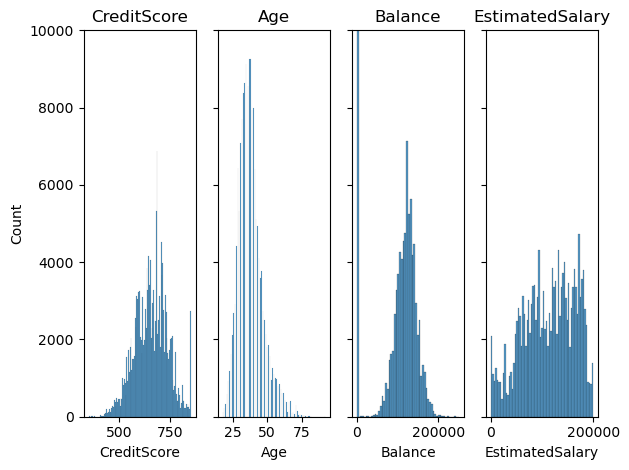

In [11]:
# visualize continuous variables through histograms
continuous_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
plt.figure(figsize=(15, 10))
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(1, len(continuous_features), sharey=True)

for i, continuous_feature in enumerate(continuous_features):
    sns.histplot(data=train, x=continuous_feature, palette=colors, ax=ax[i])
    ax[i].set_title(continuous_feature)
    ax[i].set(ylim=(0, 10000))

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

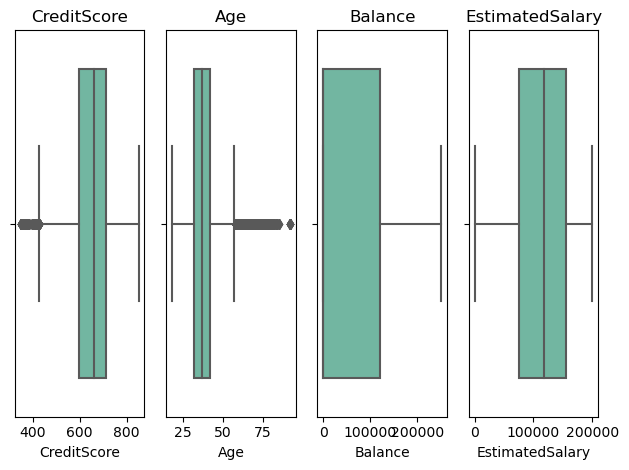

In [12]:
# visualize continuous variables through boxplots
continuous_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
plt.figure(figsize=(15, 10))
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(1, len(continuous_features), sharey=True)

for i, continuous_feature in enumerate(continuous_features):
    sns.boxplot(data=train, x=continuous_feature, palette=colors, ax=ax[i])
    ax[i].set_title(continuous_feature)

plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

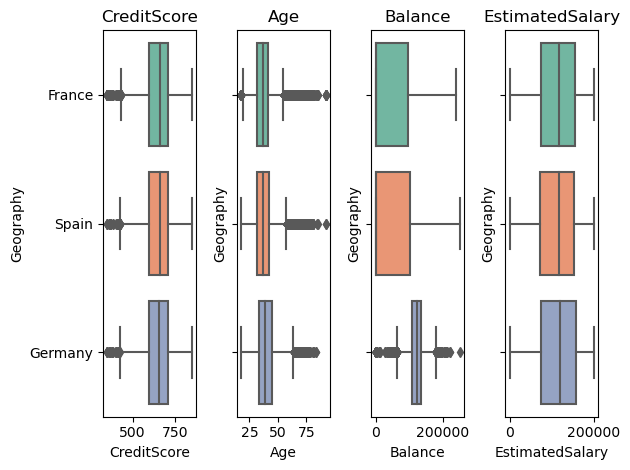

In [13]:
# visualize continuous variables through boxplots based on the level of the categorical variable Geography
continuous_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
plt.figure(figsize=(20, 10))
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(1, len(continuous_features), sharey=True)

for i, continuous_feature in enumerate(continuous_features):
    sns.boxplot(data=train, x=continuous_feature, y ='Geography', palette=colors, ax=ax[i])
    ax[i].set_title(continuous_feature)

plt.tight_layout()
plt.show()

The level of the categorical variable Geography creates a clearly distinguishable group for Balance in Germany, compared to Spain and France. Overall, it appears that people have a higher balance in Germany, compared to Spain and France, nevertheless more outliers are present for this group. On the other hand, overall, Credit Score, Age and Estimated Salary don't depend on the geographic location as much as Balance.

<Figure size 2000x1000 with 0 Axes>

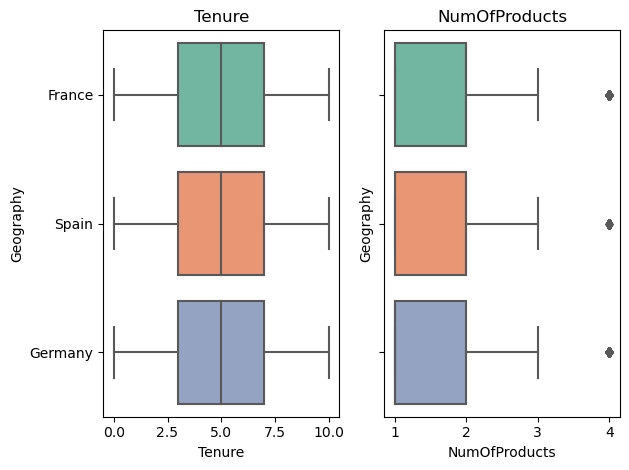

In [14]:
# visualize Tenure and NumOfProducts based on the level of the categorical variable Geography
continuous_features = ["Tenure", "NumOfProducts"]
plt.figure(figsize=(20, 10))
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(1, len(continuous_features), sharey=True)

for i, continuous_feature in enumerate(continuous_features):
    sns.boxplot(data=train, x=continuous_feature, y ='Geography', palette=colors, ax=ax[i])
    ax[i].set_title(continuous_feature)

plt.tight_layout()
plt.show()

Tenure and Number of Products don't depend on Geography.

<Figure size 2000x1000 with 0 Axes>

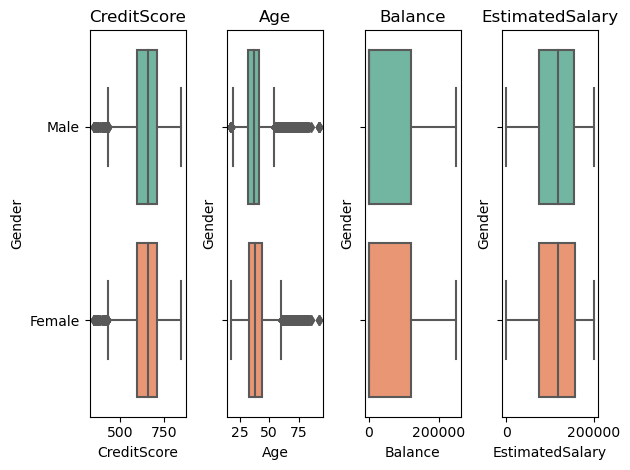

In [15]:
# visualize continuous variables through boxplots based on the level of the categorical variable Gender
continuous_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
plt.figure(figsize=(20, 10))
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(1, len(continuous_features), sharey=True)

for i, continuous_feature in enumerate(continuous_features):
    sns.boxplot(data=train, x=continuous_feature, y ='Gender', palette=colors, ax=ax[i])
    ax[i].set_title(continuous_feature)

plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

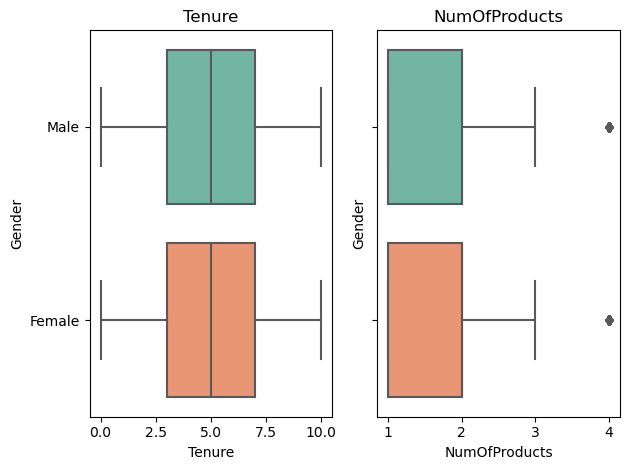

In [16]:
# visualize Tenure and NumOfProducts based on the level of the categorical variable Gender
continuous_features = ["Tenure", "NumOfProducts"]
plt.figure(figsize=(20, 10))
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(1, len(continuous_features), sharey=True)

for i, continuous_feature in enumerate(continuous_features):
    sns.boxplot(data=train, x=continuous_feature, y ='Gender', palette=colors, ax=ax[i])
    ax[i].set_title(continuous_feature)

plt.tight_layout()
plt.show()

Gender doesn't create two distinguishable groups for the considered continuous variables.

<Axes: >

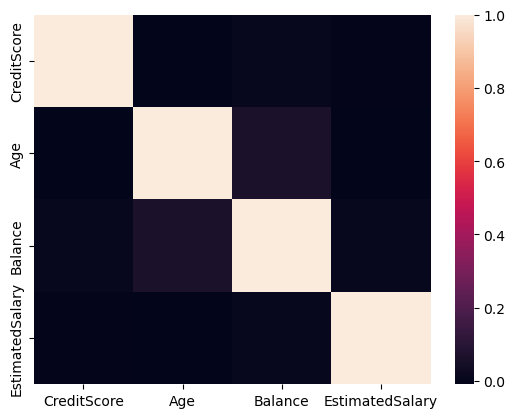

In [17]:
# plot correlation matrix of continuous variables
sns.heatmap(train[["CreditScore", "Age", "Balance", "EstimatedSalary"]].corr())

In [18]:
# measure skewness of the univariate distributions
import scipy

for continuous_var in continuous_features:
    print('Skewness of {} is {}'.format(continuous_var, scipy.stats.skew(train[continuous_var])))


Skewness of Tenure is 0.006489747249592974
Skewness of NumOfProducts is 0.368274632234982


All continuous variables are skewed and not normally distributed. Therefore, the assumptions of methods such as LDA or QDA are not satisfied.

We check for outliers through the IQR range, since the distributions are skewed.

In [19]:
continuous_train = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

In [20]:
# compute interquartile range 
for attr in continuous_train:
    q1, q3 = np.percentile(train[attr], [25, 75])
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    higher_fence = q3 + 1.5 * iqr

    print("Interquartile Range for {}: {}".format(attr, iqr))
    print("Lower Fence for {}: {}".format(attr, lower_fence))
    print("Higher Fence for {}: {}".format(attr, higher_fence))

    # remove outliers
    outliers_up = train[train[attr] > higher_fence]
    outliers_down = train[train[attr] < lower_fence]
    print(len(outliers_up))
    print(len(outliers_down))
    train.drop(train[(train[attr] > higher_fence)].index, inplace=True)
    train.drop(train[(train[attr] < lower_fence)].index, inplace=True)

Interquartile Range for CreditScore: 113.0
Lower Fence for CreditScore: 427.5
Higher Fence for CreditScore: 879.5
0
253
Interquartile Range for Age: 10.0
Lower Fence for Age: 17.0
Higher Fence for Age: 57.0
6381
0
Interquartile Range for Balance: 119794.67
Lower Fence for Balance: -179692.005
Higher Fence for Balance: 299486.675
0
0
Interquartile Range for EstimatedSalary: 80315.61
Lower Fence for EstimatedSalary: -45623.02500000001
Higher Fence for EstimatedSalary: 275639.41500000004
0
0


In [21]:
# check that outliers have been removed
print(len(train))

158400


In [22]:
to_transform = ["CreditScore", "Age", "EstimatedSalary"]
for attr in to_transform:
    # Box-cox transformation
    transformed_attr, _ = scipy.stats.boxcox(train[attr])
    train[attr + '_trans'] = transformed_attr

In [23]:
print(train.head(10))

   id  CustomerId         Surname  CreditScore Geography  Gender   Age  \
0   0    15674932  Okwudilichukwu          668    France    Male  33.0   
1   1    15749177   Okwudiliolisa          627    France    Male  33.0   
2   2    15694510           Hsueh          678    France    Male  40.0   
3   3    15741417             Kao          581    France    Male  34.0   
4   4    15766172       Chiemenam          716     Spain    Male  33.0   
5   5    15771669        Genovese          588   Germany    Male  36.0   
6   6    15692819          Ch'ang          593    France  Female  30.0   
7   7    15669611     Chukwuebuka          678     Spain    Male  37.0   
8   8    15691707           Manna          676    France    Male  43.0   
9   9    15591721        Cattaneo          583   Germany    Male  40.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       3       0.00              2        1.0             0.0   
1       1       0.00              2        1.0       

/var/folders/9v/qb7tsq853qz0520rlq7dnrxc0000gn/T/ipykernel_18412/2219504398.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=continuous_feature, palette=colors, ax=ax[i])
/var/folders/9v/qb7tsq853qz0520rlq7dnrxc0000gn/T/ipykernel_18412/2219504398.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=continuous_feature, palette=colors, ax=ax[i])
/var/folders/9v/qb7tsq853qz0520rlq7dnrxc0000gn/T/ipykernel_18412/2219504398.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=continuous_feature, palette=colors, ax=ax[i])
/var/folders/9v/qb7tsq853qz0520rlq7dnrxc0000gn/T/ipykernel_18412/2219504398.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=continuous_feature, palette=colors, ax=ax[i])


<Figure size 1500x1000 with 0 Axes>

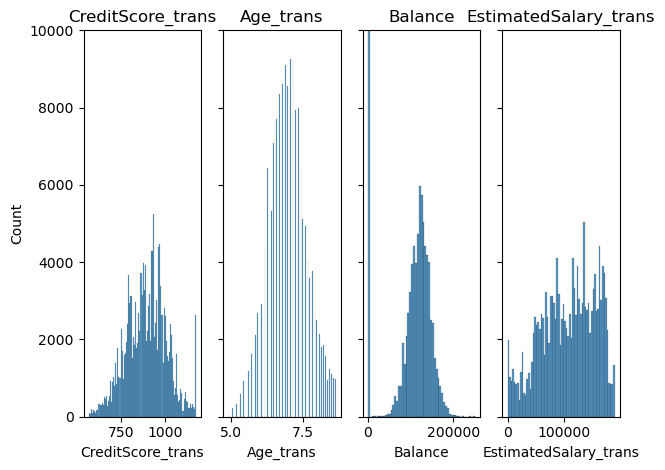

In [24]:
# visualize continuous variables through histograms
continuous_features = ["CreditScore_trans", "Age_trans", "Balance", "EstimatedSalary_trans"]
plt.figure(figsize=(15, 10))
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(1, len(continuous_features), sharey=True)

for i, continuous_feature in enumerate(continuous_features):
    sns.histplot(data=train, x=continuous_feature, palette=colors, ax=ax[i])
    ax[i].set_title(continuous_feature)
    ax[i].set(ylim=(0, 10000))

plt.tight_layout()
plt.show()

All variables, except Balance, now have a more normal distribution. We decided not to transform Balance, since, without the customer who have 0 Balance, the distribution would look normal. In fact, transforming it wouldn't bring the distribution closer to normality.

We now check for multicollinearity between transformed variables, through the correlation matrix, since the linear relations between variables can change after a Box-Cox transformation.

<Axes: >

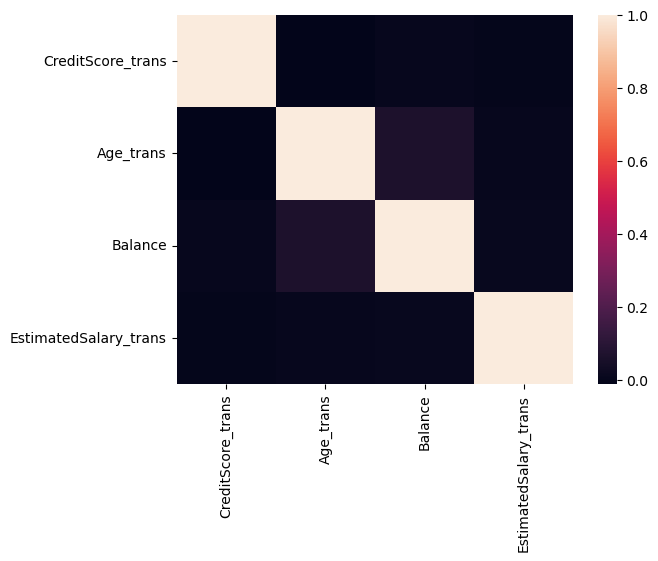

In [25]:
# correlation matrix
sns.heatmap(train[["CreditScore_trans", "Age_trans", "Balance", "EstimatedSalary_trans"]].corr())

In [26]:
# create dummy variable for Gender
# replace 'Male' with 0 and 'Female' with 1
train['Gender'] = train['Gender'].replace({'Male': 0, 'Female': 1})

In [27]:
# get dummy variable for Geography
dummies = pd.get_dummies(train['Geography'])

train_new = pd.concat([train, dummies], axis=1)      
train_new.drop(['Geography'], inplace=True, axis=1)

In [28]:
# create dummy for France and Germany
train_new['France'] = train_new['France'].replace({True: 1, False: 0})
train_new['Germany'] = train_new['Germany'].replace({True: 1, False: 0})
# drop Spain, as it is redundant (already encoded in the 0s of France and Germany)
train_new.drop(['Spain'], inplace=True, axis=1)

In [29]:
# save the new dataset (comprised of both original and transformed variables)
train_new.to_csv(r"/Users/alessia/Desktop/churn/trans.csv", index=False)